# Лабораторная работа 1
# Базовая обработка изображений с помощью OpenCV

### Работу выполнил:<span style="color:blue"> {Фамилия Имя}</span>

Задания посвящены знакомству с основой обработки изображений

Для работы с фото будем использовать пакет `cv2`. Для его установки можно прописать `!pip install opencv-python`. [Документация по OpenCV](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)

Познакомьтесь со статьями:
<ul>
<li><a href="https://arboook.com/kompyuternoe-zrenie/osnovnye-operatsii-s-izobrazheniyami-v-opencv-3-python/">Основные операции с изображениями в OpenCV 3 Python</a></li>
<li><a href="https://arboook.com/kompyuternoe-zrenie/operatsii-s-tsvetom-v-opencv3-i-python/">Операции с цветом в OpenCV3 и Python</a></li>
</ul>

Выполните приведенные ниже задания.

### Сделанную лабораторную работу отправляйте через [ФОРМУ](https://vyatsu-my.sharepoint.com/:f:/g/personal/usr09019_vyatsu_ru/Ep8q6AurefNIlDOa12RT5YwBtwdfbgDDo0pXpRQjJI3wpQ)

In [39]:
# Загружаем необходимые библиотеки
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Часть 1. Чтение, запись и отображение изображений

**Задание 1.1.** Загрузите изображение input.jpg в переменную image с помощью метода cv2.imread. Отобразите изображение с помощью метода plt.imshow.  
Если цвета отображаются некорретно, воспользутесь методом cv2.cvtColor с нужными параметрами.  
Добавьте к окну с изображением заголовок.

Text(0.5, 1.0, 'Петербург')

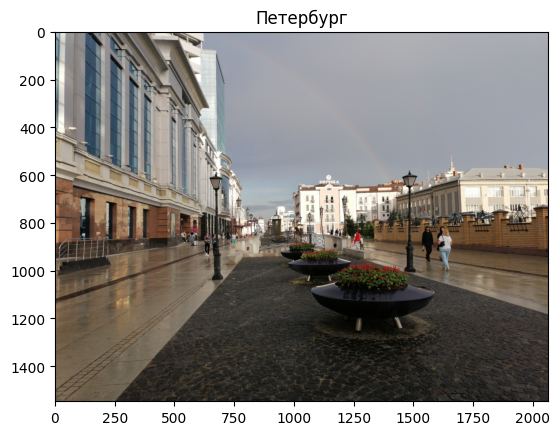

In [41]:
image = cv2.imread('/content/drive/MyDrive/Компьютерное зрение/Лабораторные работы/Лабораторная работа 1/input.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Петербург")

**Задание 1.2.** Выведите размеры изображения.

In [42]:
print('type: ', type(image))
print('shape: ', image.shape)

type:  <class 'numpy.ndarray'>
shape:  (1547, 2063, 3)


**Задание 1.3.** В новую переменную gray_image сохраните изображение image, преобразованное в чёрно-белый формат. Отобразите изображение gray_image.

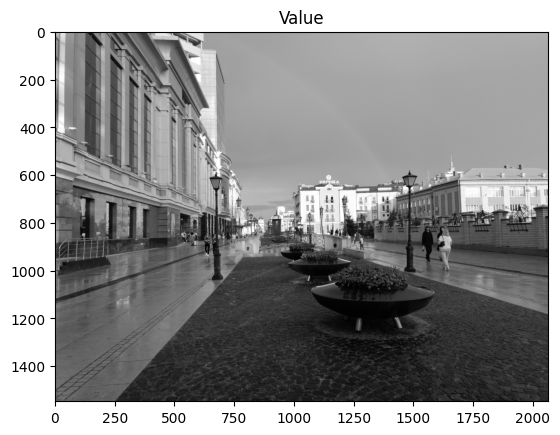

In [43]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Value');

**Задание 1.4.** Сохраните изображение из переменной gray_image в новый файл output.jpg.

In [44]:
cv2.imwrite('output.jpg', gray_image)

True

**Задание 1.5.** Отразите изображение image по вертикали, горизонтали и по вертикали и горизонтали одновременно. Отобразите полученные три изображения и сохраните их на локальный диск.

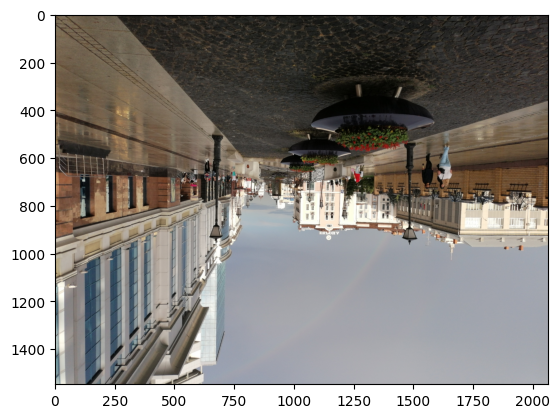

In [45]:
vertical_image = cv2.flip(image, 0)
horizontal_image= cv2.flip(image, 1)
vertical_horizontal_image = cv2.flip(image, -1)

plt.imshow(cv2.cvtColor(vertical_image, cv2.COLOR_BGR2RGB))

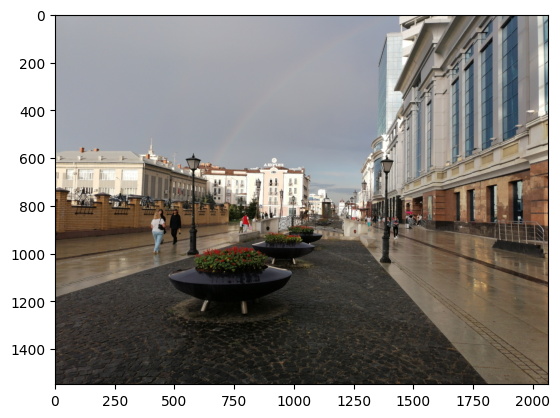

In [46]:
plt.imshow(cv2.cvtColor(horizontal_image, cv2.COLOR_BGR2RGB))


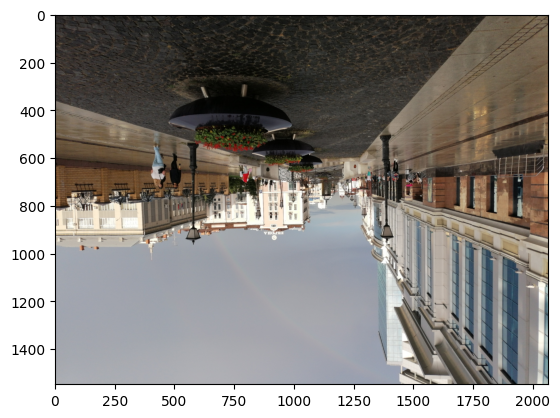

In [47]:
plt.imshow(cv2.cvtColor(vertical_horizontal_image, cv2.COLOR_BGR2RGB))

In [48]:
cv2.imwrite('vertical_flip.jpg', vertical_image)
cv2.imwrite('horizontal_flip.jpg', horizontal_image)
cv2.imwrite('vertical_horizontal_flip.jpg', vertical_horizontal_image)

True

**Задание 1.6.** Вырежите фрагмент изображения image и отобразите его. Сделайте поворот фрагмента и также отобразите его.

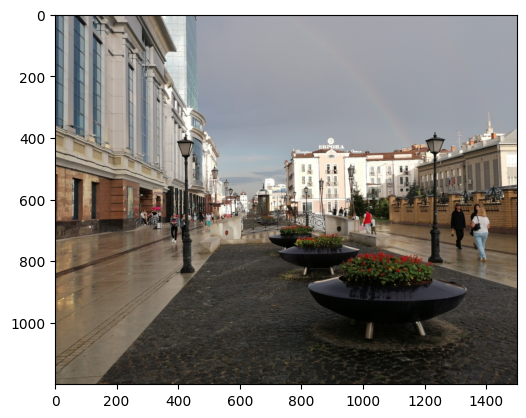

In [61]:
cropped_image = image[200:1400, 250:1750]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

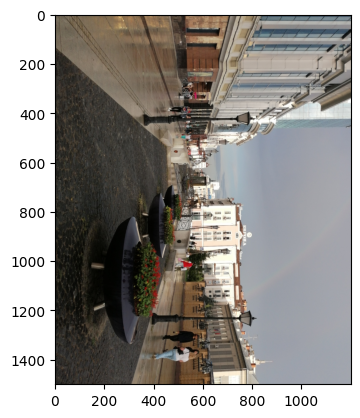

In [67]:
rotated_img = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))

## Часть 2. Цветовое пространство HSV

**Задание 2.1.** Сохраните изображение input.jpg в переменную hsv_image, содержащую значения каналов HSV (*англ. Hue, Saturation, Value — тон, насыщенность, значение*).

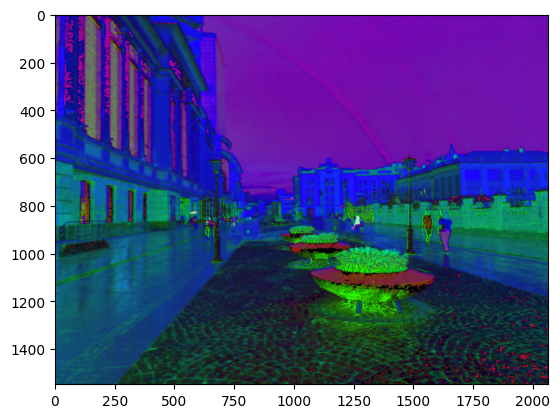

In [71]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


**Задание 2.2.** Отобразите исходное изображение и значения каналов HSV в виде отдельных черно-белых изображений. (*Подсказка: hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]*)  
У Вас должен получиться результат, изображенный ниже.

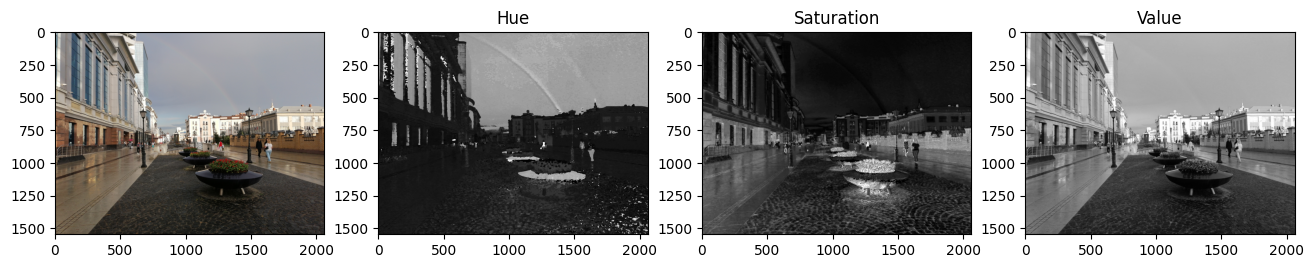

In [73]:
plt.figure(1, figsize = (16, 4))
plt.subplot(141)
plt.imshow(image[...,::-1])
plt.subplot(142)
plt.imshow(hsv_image[...,0], cmap='gray')
plt.title('Hue')
plt.subplot(143)
plt.imshow(hsv_image[...,1], cmap='gray')
plt.title('Saturation')
plt.subplot(144)
plt.imshow(hsv_image[...,2], cmap='gray')
plt.title('Value');

![title](hsv.png)

**Задание 2.3.** Сформируйте черно-белое изображение, в котором белым цветом отмечены синие пиксели исходного изображения.  
Будем считать, что в цветовом пространстве HSV синий цвет расположен в диапазоне от np.array([100, 0, 0]) до np.array([130, 255, 255]).  
Воспользуйтесь методом cv2.inRange.
У Вас должен получиться результат, изображенный ниже.

In [52]:
# Ваш код!

![title](blue_pixels.png)

**Задание 2.4.** Увеличьте компоненту Saturation для каждого пикселя изображения на 50. Отобразите новое изображение.  
Что изменилось в изображении?

In [53]:
# Ваш код!

**Задание 2.5.** Увеличьте компоненту Value для каждого пикселя изображения на 50. Отобразите новое изображение.  
Что изменилось в изображении?

In [54]:
# Ваш код!

## Часть 3. Цветовое пространство RGB

**Задание 3.1.** Используя метод cv2.split, получите значения каналов R, G, B исходного изображения. Отобразите значения этих каналов в виде отдельных черно-белых изображений.  
У Вас должен получиться результат, изображенный ниже.

In [55]:
# Ваш код!

![title](rgb.png)

**Задание 3.2.** Используя метод cv2.merge, объедините значения каналов в исходное изображение. Отобразите результат, чтобы убедиться в корректности.  
Увеличьте значение синего канала (B+50) и отобразите изображение в этом случае.  
У Вас должен получиться результат, изображенный ниже.

In [56]:
# Ваш код!

![title](merged.png)

**Задание 3.3.** Попробуйте повторить задание 2.3, используя формат изображения RGB. Самостоятельно выберите диапазон синего цвета в формате RGB.  
Сравните результат с результатом, полученным при использовании цветового представления HSV. P.s. хорошего результата не получить, выделится белый цвет, синий

In [57]:
# Ваш код!

## Часть 4. Гистограммы

**Задание 4.1.** Нарисуйте на одном графике гистограммы каналов RGB изображения. Для этого воспользуйтесь методом cv2.calcHist.  
Пример использования этого метода:  
histogram_blue = cv2.calcHist([image], [0], None, [256], [0, 256])  
(здесь изображение image хранится в формате BGR, то есть нулевой канал - синий)  
У Вас должен получиться результат, изображенный ниже.

In [58]:
# Ваш код!

![title](hist.png)

**Задание 4.2.** Используйте image.ravel(), для того чтобы преобразовать трёхканальное изображение в одномерный массив. Постройте по этому массиву гистограмму, используя plt.hist. Сравните с результатом выше.

In [59]:
# Ваш код!

## Часть 5. Рисование фигур средствами OpenCV

**Задание 5.1.** Используя подходящие методы OpenCV, нарисуйте приведенные ниже изображения (точное совпадение не обязательно).  


In [60]:
# Ваш код!

![title](blue_line.png)

![title](rectangle.png)

![title](circle.png)

![title](polygon.png)

![title](I_love_Computer_vision.png)